In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
Ns = np.array([1e3, 1e4, 2e4, 5e4, 1e5, 2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5, 9e5, 1e6])

directory = "/home/saleh/Projects/Data-simulation/"

means_ff = open(f"{directory}Means.txt")
variances_ff = open(f"{directory}Variances.txt")

means_str = means_ff.readline()
variances_str = variances_ff.readline()

means_ff.close()
variances_ff.close()

means = np.array(list(map(float, means_str.split()))[:-1])
variances = np.array(list(map(float, variances_str.split()))[:-1])

In [3]:
# Linear Regression

m0, m1 = pylab.polyfit(Ns, means, 1)  # p is equivalent to m0
meansModel = m0*Ns + m1

v0, v1 = pylab.polyfit(Ns, variances, 1)  # p is equivalent to v0, also.
variancesModel = v0*Ns + v1

mv0, mv1 = pylab.polyfit(means, variances, 1)  # for poisson PMF, mv0 should be 1
mean_variance_model = mv0*means + mv1



In [4]:
def RSquared(data, model):
    Mean = np.mean(data)
    e = data - model
    SS_res = np.sum(np.array(list(map(lambda x: x**2, e))))
    SS_tot = np.var(data) * len(data)
    
    return 1 - (SS_res / SS_tot)

NM_RSq = RSquared(data=means, model=meansModel)
NV_RSq = RSquared(data=variances, model=variancesModel)
MV_RSq = RSquared(data=variances, model=mean_variance_model)

# Data Visualization

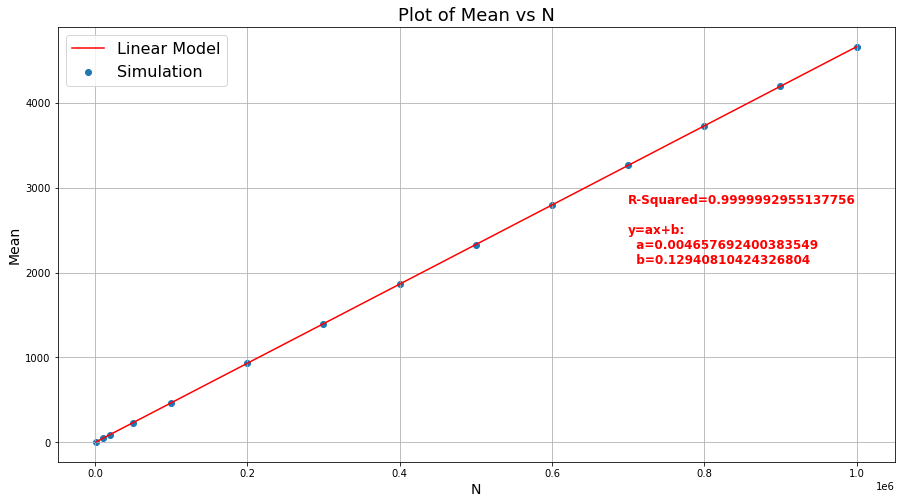

In [5]:
# Mean
plt.figure(figsize=(15,8))

plt.title("Plot of Mean vs N", fontsize=18)

plt.scatter(Ns, means, label="Simulation")
plt.plot(Ns, meansModel, label="Linear Model", c='r')

plt.xlabel("N", fontsize=14)
plt.ylabel("Mean", fontsize=14)

plt.text(0.7e6, 2100, f"R-Squared={NM_RSq}\n\ny=ax+b:\n  a={m0}\n  b={m1}", c='r', weight='bold', fontsize=12)

plt.legend(fontsize=16)
plt.grid()

plt.savefig("Mean.jpeg")
plt.show()


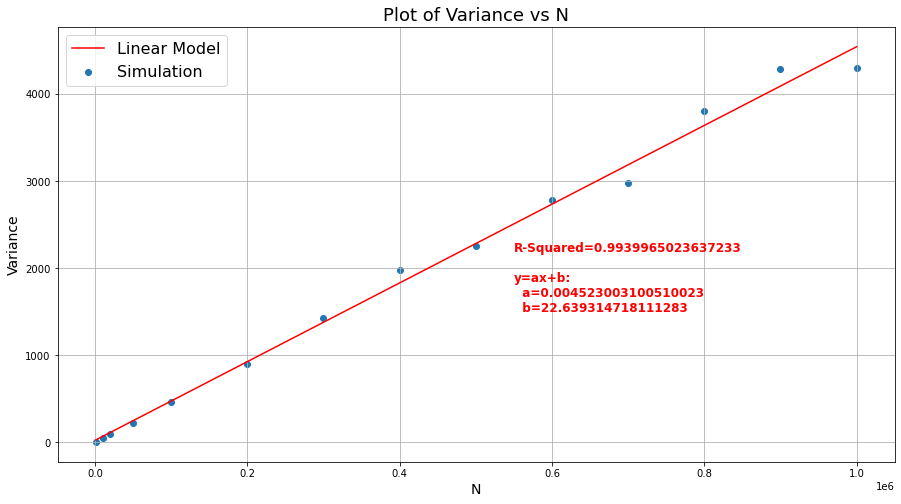

In [6]:
# Variance

plt.figure(figsize=(15,8))

plt.title("Plot of Variance vs N", fontsize=18)

plt.scatter(Ns, variances, label="Simulation")
plt.plot(Ns, variancesModel, label="Linear Model", c='r')

plt.xlabel("N", fontsize=14)
plt.ylabel("Variance", fontsize=14)

plt.text(0.55e6, 1500, f"R-Squared={NV_RSq}\n\ny=ax+b:\n  a={v0}\n  b={v1}", c='r', weight='bold', fontsize=12)


plt.legend(fontsize=16)
plt.grid()

plt.savefig("Variance.jpeg")
plt.show()


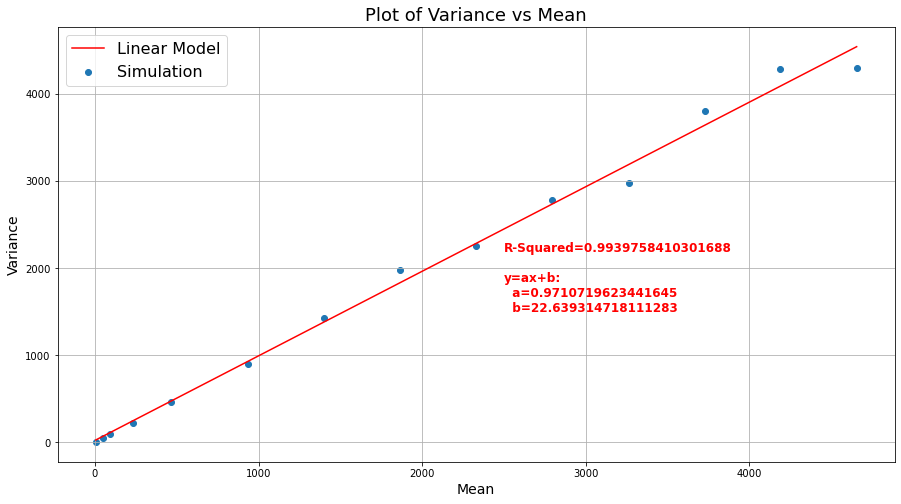

In [7]:
# Mean vs Variance

plt.figure(figsize=(15,8))

plt.title("Plot of Variance vs Mean", fontsize=18)

plt.scatter(means, variances, label="Simulation")
plt.plot(means, mean_variance_model, label="Linear Model", c='r')

plt.xlabel("Mean", fontsize=14)
plt.ylabel("Variance", fontsize=14)

plt.text(2500, 1500, f"R-Squared={MV_RSq}\n\ny=ax+b:\n  a={mv0}\n  b={v1}", c='r', weight='bold', fontsize=12)

plt.legend(fontsize=16)
plt.grid()

plt.savefig("VM.jpeg")
plt.show()
